In [135]:
#Linear Classification
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#data
iris = datasets.load_iris()
#x = iris.data
#y = iris.target

x = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica


#train_test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)#, random_state=1)

#feature engineering and modeling
model = Pipeline([
        ("scaler", StandardScaler()),
        ("lin_svc", LinearSVC(C=10, loss="hinge")),
        ])

model.fit(x_train, y_train)

#accuracy
y_pred = model.predict(x_test)
print('accuracy = {:.1%}'.format(accuracy_score(y_test,y_pred)))


accuracy = 90.0%


In [136]:
#Nonlinear Classification
#Polynomial SVC
from sklearn.svm import SVC
model2 = Pipeline((
    ('scaler',StandardScaler()),
    ('svc', SVC(kernel='poly', degree=10, coef0=1, C=1))
))
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print('accuracy = {:.1%}'.format(accuracy_score(y_test,y_pred2)))

accuracy = 93.3%


In [137]:
#Nonlinear Classification
#other SVC
model3=Pipeline((
    ('scaler',StandardScaler()),
    ('svc', SVC(kernel='rbf', gamma=1, C=1))
))
model3.fit(x_train, y_train)
y_pred3=model3.predict(x_test)
print('accuracy = {:.1%}'.format(accuracy_score(y_test,y_pred3)))

accuracy = 90.0%


[3.80253508] [3.03817576]
r_square = 95.8%


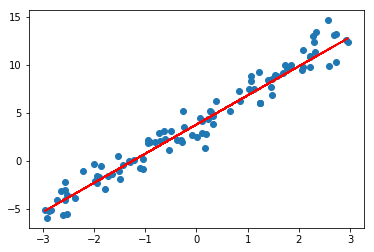

In [139]:
#Linear Regression
import numpy as np
x=6*np.random.rand(100,1)-3
y=(4+3*x+np.random.randn(100,1)).ravel()

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.2)
svm_reg.fit(x,y)

print(svm_reg.intercept_, svm_reg.coef_)
y_pred=svm_reg.predict(x)

from sklearn.metrics import r2_score
print('r_square = {:.1%}'.format(r2_score(y, y_pred)))

plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

r_square = 20.9%


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


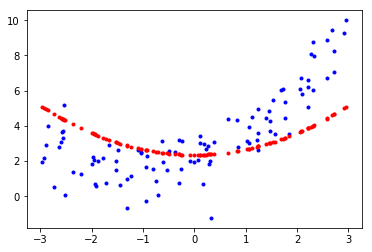

In [144]:
#Nonlinear Regression
y2 = (0.5 * x**2 + x + 2 + np.random.randn(100,1)).ravel()
from sklearn.svm import SVR
svr_reg = SVR(kernel='poly', degree=2, C=1, epsilon=0.1)
svr_reg.fit(x,y2)

y2_pred=svr_reg.predict(x)
print('r_square = {:.1%}'.format(r2_score(y2, y2_pred)))
plt.plot(x,y2,'b.')
plt.plot(x,y2_pred,'r.')
plt.show()
